<a href="https://colab.research.google.com/github/sendrosa/ponzi_ethereum/blob/main/data_analysis_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature for Opcode and Size of Opcode

We create a function that append a column with the Opcode. Opcode created from the bytecode. The correspondence is derived from the values corresponding to the machine commands in a hexadecimal number (opcode variable). We also remove the memory locations that in this case do not concern us.
Finally we add a column in which we save the size of the contract.

In [ ]:
import csv
import pandas as pd
import sys

csv.field_size_limit(sys.maxsize)

opcodes = {
    '00' : 'STOP',
    '01' : 'ADD',
    '02' : 'MUL',
    '03' : 'SUB',
    '04' : 'DIV',
    '05' : 'SDIV',
    '06' : 'MOD',
    '07' : 'SMOD',
    '08' : 'ADDMOD',
    '09' : 'MULMOD',
    '0a' : 'EXP',
    '0b' : 'SIGNEXTEND',
    '10' : 'LT',
    '11' : 'GT',
    '12' : 'SLT',
    '13' : 'SGT',
    '14' : 'EQ',
    '15' : 'ISZERO',
    '16' : 'AND',
    '17' : 'OR', # 'EVMOR'
    '18' : 'XOR',
    '19' : 'NOT',
    '1a' : 'BYTE',
    '1b' : 'SHL',
    '1c' : 'SHR',
    '1d' : 'SAR',
    '20' : 'SHA3',
    '30' : 'ADDRESS',
    '31' : 'BALANCE',
    '32' : 'ORIGIN',
    '33' : 'CALLER',
    '34' : 'CALLVALUE',
    '35' : 'CALLDATALOAD',
    '36' : 'CALLDATASIZE',
    '37' : 'CALLDATACOPY',
    '38' : 'CODESIZE',
    '39' : 'CODECOPY',
    '3a' : 'GASPRICE',
    '3b' : 'EXTCODESIZE',
    '3c' : 'EXTCODECOPY',
    '3d' : 'RETURNDATASIZE',
    '3e' : 'RETURNDATACOPY',
    '3f' : 'EXTCODEHASH',
    '40' : 'BLOCKHASH',
    '41' : 'COINBASE',
    '42' : 'TIMESTAMP',
    '43' : 'NUMBER',
    '44' : 'DIFFICULTY',
    '45' : 'GASLIMIT',
    '50' : 'POP',
    '51' : 'MLOAD',
    '52' : 'MSTORE',
    '53' : 'MSTORE8',
    '54' : 'SLOAD',
    '55' : 'SSTORE',
    '56' : 'JUMP',
    '57' : 'JUMPI',
    '58' : 'PC',
    '59' : 'MSIZE',
    '5a' : 'GAS',
    '5b' : 'JUMPDEST',
    '60' : 'PUSH1',
    '61' : 'PUSH2',
    '62' : 'PUSH3',
    '63' : 'PUSH4',
    '64' : 'PUSH5',
    '65' : 'PUSH6',
    '66' : 'PUSH7',
    '67' : 'PUSH8',
    '68' : 'PUSH9',
    '69' : 'PUSH10',
    '6a' : 'PUSH11',
    '6b' : 'PUSH12',
    '6c' : 'PUSH13',
    '6d' : 'PUSH14',
    '6e' : 'PUSH15',
    '6f' : 'PUSH16',
    '70' : 'PUSH17',
    '71' : 'PUSH18',
    '72' : 'PUSH19',
    '73' : 'PUSH20',
    '74' : 'PUSH21',
    '75' : 'PUSH22',
    '76' : 'PUSH23',
    '77' : 'PUSH24',
    '78' : 'PUSH25',
    '79' : 'PUSH26',
    '7a' : 'PUSH27',
    '7b' : 'PUSH28',
    '7c' : 'PUSH29',
    '7d' : 'PUSH30',
    '7e' : 'PUSH31',
    '7f' : 'PUSH32',
    '80' : 'DUP1',
    '81' : 'DUP2',
    '82' : 'DUP3',
    '83' : 'DUP4',
    '84' : 'DUP5',
    '85' : 'DUP6',
    '86' : 'DUP7',
    '87' : 'DUP8',
    '88' : 'DUP9',
    '89' : 'DUP10',
    '8a' : 'DUP11',
    '8b' : 'DUP12',
    '8c' : 'DUP13',
    '8d' : 'DUP14',
    '8e' : 'DUP15',
    '8f' : 'DUP16',
    '90' : 'SWAP1',
    '91' : 'SWAP2',
    '92' : 'SWAP3',
    '93' : 'SWAP4',
    '94' : 'SWAP5',
    '95' : 'SWAP6',
    '96' : 'SWAP7',
    '97' : 'SWAP8',
    '98' : 'SWAP9',
    '99' : 'SWAP10',
    '9a' : 'SWAP11',
    '9b' : 'SWAP12',
    '9c' : 'SWAP13',
    '9d' : 'SWAP14',
    '9e' : 'SWAP15',
    '9f' : 'SWAP16',
    'a0' : 'LOG0',
    'a1' : 'LOG1',
    'a2' : 'LOG2',
    'a3' : 'LOG3',
    'a4' : 'LOG4',
    'f0' : 'CREATE',
    'f1' : 'CALL',
    'f2' : 'CALLCODE',
    'f3' : 'RETURN',
    'f4' : 'DELEGATECALL',
    'f5' : 'CREATE2',
    'fa' : 'STATICCALL',
    'fd' : 'REVERT',
    'fe' : 'INVALID',
    'ff' : 'SELFDESTRUCT',
#   'ff' : 'SUICIDE',
}

OPC = [
    'STOP',
    'ADD',
    'MUL',
    'SUB',
    'DIV',
    'SDIV',
    'MOD',
    'SMOD',
    'ADDMOD',
    'MULMOD',
    'EXP',
    'SIGNEXTEND',
    'LT',
    'GT',
    'SLT',
     'SGT',
     'EQ',
     'ISZERO',
     'AND',
     'OR',
     'XOR',
    'NOT',
     'BYTE',
    'SHL',
     'SHR',
    'SAR',
     'SHA3',
    'ADDRESS',
    'BALANCE',
     'ORIGIN',
    'CALLER',
     'CALLVALUE',
     'CALLDATALOAD',
     'CALLDATASIZE',
     'CALLDATACOPY',
     'CODESIZE',
    'CODECOPY',
     'GASPRICE',
    'EXTCODESIZE',
    'EXTCODECOPY',
    'RETURNDATASIZE',
    'RETURNDATACOPY',
  'EXTCODEHASH',
     'BLOCKHASH',
     'COINBASE',
   'TIMESTAMP',
    'NUMBER',
     'DIFFICULTY',
    'GASLIMIT',
    'POP',
    'MLOAD',
    'MSTORE',
    'MSTORE8',
     'SLOAD',
    'SSTORE',
   'JUMP',
     'JUMPI',
    'PC',
     'MSIZE',
   'GAS',
     'JUMPDEST',
  #   'PUSH1',
  #   'PUSH2',
  #  'PUSH3',
  #   'PUSH4',
  #   'PUSH5',
  #   'PUSH6',
  #   'PUSH7',
  #    'PUSH8',
  #    'PUSH9',
  #    'PUSH10',
  #    'PUSH11',
  #    'PUSH12',
  #   'PUSH13',
  #    'PUSH14',
  #    'PUSH15',
  #    'PUSH16',
  #    'PUSH17',
  #   'PUSH18',
  #    'PUSH19',
  #    'PUSH20',
  #    'PUSH21',
  #    'PUSH22',
  #    'PUSH23',
  #    'PUSH24',
  #    'PUSH25',
  #    'PUSH26',
  #    'PUSH27',
  #    'PUSH28',
  #    'PUSH29',
  #   'PUSH30',
  #   'PUSH31',
  #    'PUSH32',
  #    'DUP1',
  #    'DUP2',
  #    'DUP3',
  #   'DUP4',
  #   'DUP5',
  #    'DUP6',
  #    'DUP7',
  #    'DUP8',
  #    'DUP9',
  #    'DUP10',
  #    'DUP11',
  #    'DUP12',
  #    'DUP13',
  #    'DUP14',
  #    'DUP15',
  #    'DUP16',
  #    'SWAP1',
  #    'SWAP2',
  #    'SWAP3',
  #    'SWAP4',
  #    'SWAP5',
  #    'SWAP6',
  #    'SWAP7',
  #    'SWAP8',
  #   'SWAP9',
  #    'SWAP10',
  #    'SWAP11',
  #    'SWAP12',
  #    'SWAP13',
  #    'SWAP14',
  #    'SWAP15',
  #    'SWAP16',
     'LOG0',
     'LOG1',
     'LOG2',
     'LOG3',
     'LOG4',
     'CREATE',
     'CALL',
     'CALLCODE',
     'RETURN',
     'DELEGATECALL',
     'CREATE2',
    'STATICCALL',
     'REVERT',
     'INVALID',
     'SELFDESTRUCT']

def push_bytes(h, mode):
    i = str(int(h, 16))
    return {
        'hex'     :           '0x' + h  ,
        'int'     : i                   ,
        'int:hex' : i + ':' + '0x' + h  ,
    }[mode]

def pc(cnt, size):
    return '[' + str(cnt).zfill(size) + ']'

# Decode ByteCodes to Opcodes
def decode(hexcode, mode):
    size = len(str(len(hexcode)))
    h = ''
    o = ''
    pushcnt = 0
    cnt = -1
    for item in hexcode:
        cnt += 1
        if pushcnt > 0:
            h += item.lower()
            pushcnt -= 1
            if pushcnt == 0:
                i = str(int(h, 16))
                o += push_bytes(h, mode) + '\n'
                h = ''
        elif isinstance(item, str) and item.lower() in opcodes:
            o += pc(cnt, size) + ' ' + item.lower() + ' ' + opcodes[item.lower()]
            if int('60', 16) <= int(item, 16) <= int('7f', 16):
                pushcnt = int(item, 16) - int('60', 16) + 1
                o += ' '
            else:
                o += '\n'
        else:
            o += pc(cnt, size) + ' ' + item.lower() + ' ERROR\n'
#           raise Exception("Invalid opcode: " + str(item))
    if h:
        o += 'ERROR ' + push_bytes(h, mode) + ' (' + str(pushcnt) + ' bytes missed)\n'
#       raise Exception("Not enough push bytes: " + h)
    return o.strip()

with open('labeled_contract_info.csv','r') as csvinput:
    with open('labeled_contract_info_append.csv', 'w') as csvoutput:
        writer = csv.writer(csvoutput)
        reader = csv.reader(csvinput)

        row = next(reader)
        row.append('Opcode')
        row.append('Size')
        writer.writerow(row)

        for row in reader:
            hexcode=str(row[8])
            opcode =(decode([hexcode[i:i+2] for i in range(2, len(hexcode)-1, 2)], 'int:hex'))
            opcode=opcode.split()
            resultwords  = [word for word in opcode if word in OPC]
            result = ' '.join(resultwords)
            row.append(result)
            row.append(len(hexcode))
            writer.writerow(row)

#Code counter
We find the use of orders depending on the contract.

In [ ]:
from collections import Counter 

with open('labeled_contract_info_append.csv','r') as csvinput:
    with open('labeled_contract_info_append_new.csv', 'w') as csvoutput:
        writer = csv.writer(csvoutput)
        reader = csv.reader(csvinput)

        row = next(reader)
        row.append('fr_opcode')
        row.append('opc_split')

        writer.writerow(row)

        for row in reader:
          data_set=row[10]
          split_it = data_set.split() 
          count = Counter(split_it) 
          row.append(Counter({key: count[key] for key in count if key in OPC}).most_common(10))
          row.append(split_it)
          writer.writerow(row)      

#CSV preview

In [ ]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

filepath = "labeled_contract_info_append_new.csv"
data = pd.read_csv(filepath)
data.head(5)



Setup Complete


,address,createdBlockNumber,createdTimestamp,createdTransactionHash,creator,creatorIsContract,createValue,creationCode,contractCode,flag,Opcode,Size,fr_opcode,opc_split
0,0x6e38a457c722c6011b2dfa06d49240e797844d66,49880,1438980507,0xde920d165a8a3352156327edb7125e699cee116d8206...,0x7e7ec15a5944e978257ddae0008c2f2ece0a6090,0,0.0,0x60606040526103a7806100136000396000f300606060...,0x60606040526000357c01000000000000000000000000...,0,MSTORE CALLDATALOAD DIV EQ JUMPI EQ JUMPI EQ J...,1873,"[('POP', 60), ('ADD', 50), ('JUMPDEST', 27), (...","['MSTORE', 'CALLDATALOAD', 'DIV', 'EQ', 'JUMPI..."
1,0x109c4f2ccc82c4d77bde15f306707320294aea3f,49924,1438981410,0xb8f2ff00ccd2db351281cff6da5dd47b4d6c87e851ff...,0x881b0a4e9c55d08e31d8d3c022144d75a454211c,0,0.0,0x60606040526000805560038054600680835591908290...,0x6060604052361561001f5760e060020a600035046372...,1,MSTORE CALLDATASIZE ISZERO JUMPI EXP CALLDATAL...,1535,"[('POP', 34), ('SLOAD', 29), ('ADD', 28), ('JU...","['MSTORE', 'CALLDATASIZE', 'ISZERO', 'JUMPI', ..."
2,0x793ae8c1b1a160bfc07bfb0d04f85eab1a71f4f2,63809,1439210480,0x258a93bf65790447d671ba836ca522fecd0f8034bfda...,0xc8ebccc5f5689fa8659d83713341e5ad19349448,0,0.0,0x60606040525b662386f26fc100006000600050819055...,0x60606040526000357c01000000000000000000000000...,0,MSTORE CALLDATALOAD DIV EQ JUMPI JUMP JUMPDEST...,657,"[('POP', 20), ('JUMPDEST', 8), ('MSTORE', 6), ...","['MSTORE', 'CALLDATALOAD', 'DIV', 'EQ', 'JUMPI..."
3,0x5fe5b7546d1628f7348b023a0393de1fc825a4fd,66126,1439249180,0x8478eedb4b0a7309de241b4da8311c6e0b91405bd4cd...,0xa14cf6cec1c6aae4b608458f6e14692863a937aa,0,0.0,0x610100604052607560608190527f0a2d2d2d2d2d2d2d...,0x606060405236156100615760e060020a60003504631c...,0,MSTORE CALLDATASIZE ISZERO JUMPI EXP CALLDATAL...,4065,"[('POP', 91), ('ADD', 56), ('MSTORE', 51), ('J...","['MSTORE', 'CALLDATASIZE', 'ISZERO', 'JUMPI', ..."
4,0x273930d21e01ee25e4c219b63259d214872220a2,116526,1440088809,0x3010140fbe38c0af0cc1020a82f4c1cac76f5cbb34ab...,0xb1a2b43a7433dd150bb82227ed519cd6b142d382,0,0.0,0x60606040526002610108600050556040516110e53803...,0x606060405236156100da5760e060020a600035046317...,0,MSTORE CALLDATASIZE ISZERO JUMPI EXP CALLDATAL...,8065,"[('POP', 172), ('ADD', 122), ('JUMPDEST', 105)...","['MSTORE', 'CALLDATASIZE', 'ISZERO', 'JUMPI', ..."


#N-word
We are trying to find the best n for n-word algorithm

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words="english", max_df=0.8, min_df=7, ngram_range=(1, 4))
vectorizer.fit(data["Opcode"])

flag_counts = {}
words = vectorizer.get_feature_names()
for y in [0, 1]:
    vectors = vectorizer.transform(data["Opcode"][data["flag"] == y])
    counts = vectors.toarray().sum(axis=0)
    word_counts = {}
    for i in range(len(words)):
        word_counts[words[i]] = counts[i]
    flag_counts[y] = word_counts

most_common_words = pd.DataFrame(flag_counts)
most_common_words.sort_values(by=[0], ascending=False).head(10)



,0,1
mstore sha3,35088,863
mstore mstore sha3,23087,431
invalid,22687,709
invalid jumpdest,22600,702
jumpi invalid,22277,702
jumpi invalid jumpdest,22277,702
return jumpdest callvalue,20931,655
iszero jumpi invalid,20672,629
iszero jumpi invalid jumpdest,20672,629
sha3 sload,20297,469


In [ ]:
most_common_words.sort_values(by=[1], ascending=False).head(10)


,0,1
lt iszero,15902,1090
lt iszero jumpi,12005,959
mstore sha3,35088,863
add sload,10952,754
sload exp sub,12068,748
invalid,22687,709
invalid jumpdest,22600,702
jumpi invalid jumpdest,22277,702
jumpi invalid,22277,702
pop sload,9953,690


#Imbalance Class

Percentage of ponzi: 4.92%


Text(0.5, 1.0, 'Ponzi Schemes')

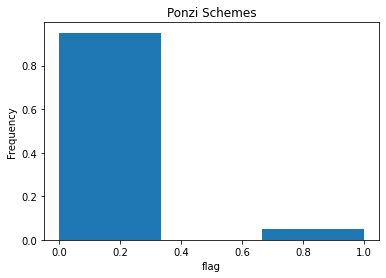

In [ ]:
print('Percentage of ponzi: {0}%'.format(round(100 * data['flag'].sum() / len(data['flag']), 2)))
plt.hist(data['flag'], bins=3, weights=np.ones(len(data['flag'])) / len(data['flag']))
plt.xlabel('flag')
plt.ylabel('Frequency')
plt.title('Ponzi Schemes')

#Set the train Data

In [ ]:
from sklearn.model_selection import train_test_split

code=data["Opcode"].values
y=data["flag"].values
train, test, y_train, y_test = train_test_split(code, y, test_size=0.4)

vectorizer = CountVectorizer(ngram_range=(1, 4))
vectorizer.fit(train)

X_train = vectorizer.transform(train)
X_test  = vectorizer.transform(test)


In [ ]:
X_train


<1402x36646 sparse matrix of type '<class 'numpy.int64'>'
	with 1148880 stored elements in Compressed Sparse Row format>

#Tune parameters for logistic regression

Best parameters : {'class_weight': {0: 0.7344827586206897, 1: 0.2655172413793103}}


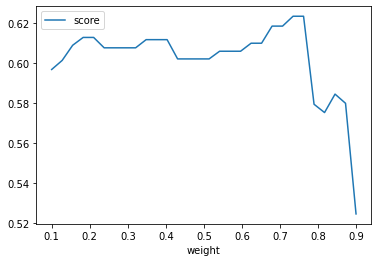

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_decision_regions, plot_confusion_matrix
from matplotlib import pyplot as plt

from sklearn.model_selection import GridSearchCV

weights = np.linspace(0.1, 0.9, 30)

gsc = GridSearchCV(
    estimator=LogisticRegression(max_iter=10000),
    param_grid={
        'class_weight': [{0: x, 1: 1.0-x} for x in weights]
        },
    scoring='f1',
    cv=3
)
grid_result = gsc.fit(X_train, y_train)

print("Best parameters : %s" % grid_result.best_params_)

# Plot the weights vs f1 score
dataz = pd.DataFrame({ 'score': grid_result.cv_results_['mean_test_score'],
                       'weight': weights })
dataz.plot(x='weight')


#Logistic regression 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       886
           1       0.74      0.76      0.75        49

    accuracy                           0.97       935
   macro avg       0.86      0.87      0.87       935
weighted avg       0.97      0.97      0.97       935



(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f97d1dee278>)

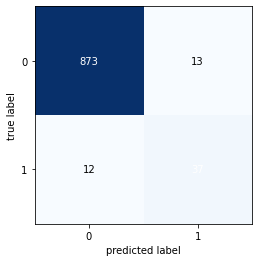

In [ ]:
lr = LogisticRegression(**grid_result.best_params_, max_iter=10000)

# Fit..
lr.fit(X_train, y_train)

# Predict..
y_pred = lr.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
plot_confusion_matrix(confusion_matrix(y_test, y_pred))


#Classifiers testing
Use different classifiers to find what is the best for our data.

In [ ]:
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix
from xgboost import XGBClassifier


In [ ]:
clfs = {
    'XGB':XGBClassifier(),
    'svm1': SVC(kernel='linear'),
    'mlp1': MLPClassifier(),
    'mlp2': MLPClassifier(hidden_layer_sizes=[100, 100]),
    'ada': AdaBoostClassifier(),
    'dtc': DecisionTreeClassifier(),
    'rfc': RandomForestClassifier(),
    'gbc': GradientBoostingClassifier(),
    'lr': LogisticRegression(**grid_result.best_params_, max_iter=10000)


}


XGB
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       886
           1       0.94      0.69      0.80        49

    accuracy                           0.98       935
   macro avg       0.96      0.85      0.90       935
weighted avg       0.98      0.98      0.98       935

svm1
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       886
           1       0.67      0.78      0.72        49

    accuracy                           0.97       935
   macro avg       0.83      0.88      0.85       935
weighted avg       0.97      0.97      0.97       935

mlp1
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       886
           1       0.84      0.76      0.80        49

    accuracy                           0.98       935
   macro avg       0.91      0.87      0.89       935
weighted avg       0.98      0.98      0.98       935

mlp2


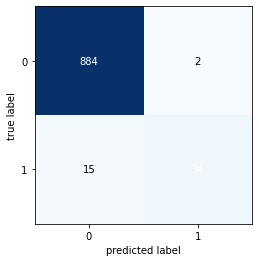

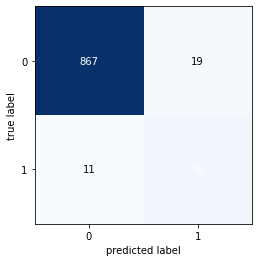

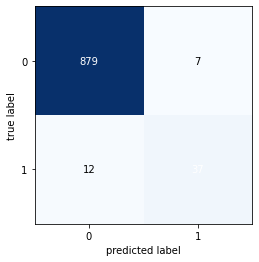

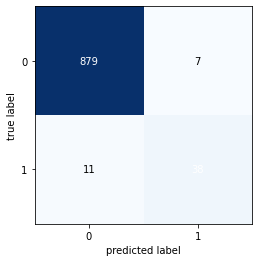

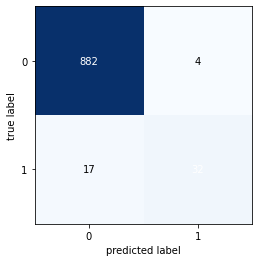

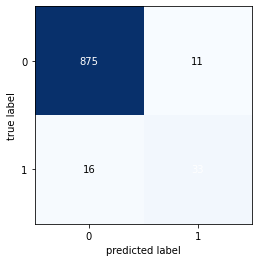

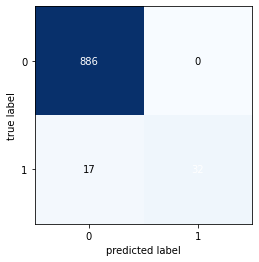

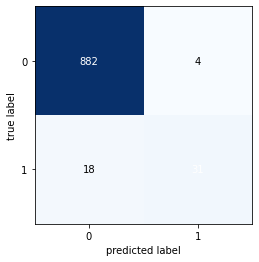

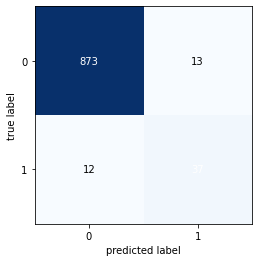

In [ ]:
f1_scores = dict()
for clf_name in clfs:
    print(clf_name)
    clf = clfs[clf_name]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1_scores[clf_name] = f1_score(y_test, y_pred)
    # Evaluate the model
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(confusion_matrix(y_test, y_pred))






In [ ]:
f1_scores

{'XGB': 0.7999999999999999,
 'ada': 0.7529411764705882,
 'dtc': 0.7096774193548386,
 'gbc': 0.7380952380952381,
 'lr': 0.7474747474747474,
 'mlp1': 0.7956989247311828,
 'mlp2': 0.8085106382978723,
 'rfc': 0.7901234567901235,
 'svm1': 0.7169811320754716}